# Import Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
df=pd.read_csv(r'E:\My_Notes\Log Classification\Training\Dataset\synthetic_logs.csv')
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


# Data Inspection


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     2410 non-null   object
 1   source        2410 non-null   object
 2   log_message   2410 non-null   object
 3   target_label  2410 non-null   object
 4   complexity    2410 non-null   object
dtypes: object(5)
memory usage: 94.3+ KB


In [4]:
df.target_label.value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

In [5]:
df.source.value_counts()

source
ThirdPartyAPI      496
ModernHR           492
BillingSystem      479
AnalyticsEngine    471
ModernCRM          465
LegacyCRM            7
Name: count, dtype: int64

# Data Cleaning

In [6]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='mixed')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     2410 non-null   datetime64[ns]
 1   source        2410 non-null   object        
 2   log_message   2410 non-null   object        
 3   target_label  2410 non-null   object        
 4   complexity    2410 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 94.3+ KB


In [8]:
df.isnull().sum() #Checking for Null values

timestamp       0
source          0
log_message     0
target_label    0
complexity      0
dtype: int64

In [9]:
df.duplicated().sum() #Checking for duplicates

0

# EDA(Exploratory Data Analysis)

In [10]:
df['log_message'][9]

'nova.osapi_compute.wsgi.server [req-2bf7cfee-a236-42f3-8fb1-96fefab0b302 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" RCODE  200 len: 1874 time: 0.1794369'

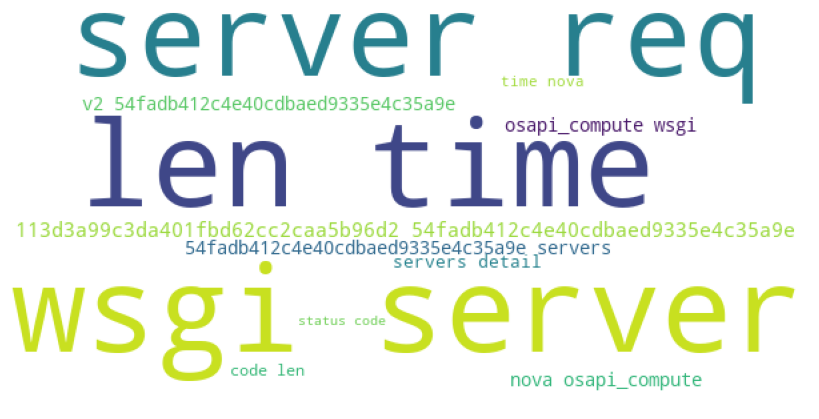

In [11]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.log_message:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 600, height = 300,
                background_color ='white',

                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Feature Engineering

In [12]:
pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sentence_transformers import SentenceTransformer

RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
model=SentenceTransformer('all-MiniLm-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings=model.encode(df['log_message'].tolist())

In [ ]:
embeddings

array([[-0.1029396 ,  0.03354595, -0.02202608, ...,  0.00457793,
        -0.04259716,  0.00322623],
       [ 0.00804573, -0.03573924,  0.04938739, ...,  0.01538321,
        -0.06230951, -0.02774664],
       [-0.00908221,  0.13003927, -0.05275569, ...,  0.02014104,
        -0.05117096, -0.02930295],
       ...,
       [-0.04022269,  0.0422436 , -0.06610421, ...,  0.02363671,
        -0.00530876,  0.02044457],
       [-0.0360345 ,  0.01960898,  0.10052753, ...,  0.03668106,
        -0.02487853, -0.00578848],
       [ 0.01457432,  0.0491183 , -0.00301354, ...,  0.01029743,
        -0.00068495,  0.0070886 ]], dtype=float32)

# Clustering(DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.2,min_samples=1,metric='euclidean')

clusters=dbscan.fit_predict(embeddings)

In [ ]:
df['clusters']=clusters

In [ ]:
df['clusters'].unique()

array([   0,    1,    2, ..., 1061, 1062, 1063])

In [ ]:
df[df['clusters']==7]

,timestamp,source,log_message,target_label,complexity,clusters
8,2025-02-12 10:42:29,ThirdPartyAPI,nova.compute.claims [req-a07ac654-8e81-416d-bf...,Resource Usage,bert,7
197,2025-12-13 14:16:52,ModernHR,nova.compute.claims [req-9118475d-6e72-48fa-9d...,Resource Usage,bert,7
240,2025-05-25 12:11:09,ThirdPartyAPI,nova.compute.claims [req-4b4dd551-26d8-48e2-bd...,Resource Usage,bert,7
355,2025-10-30 11:34:10,BillingSystem,nova.compute.claims [req-6f9ecdfe-481c-4535-9b...,Resource Usage,bert,7
451,2025-09-13 06:02:40,ThirdPartyAPI,nova.compute.claims [req-01d570b0-78a7-4719-b7...,Resource Usage,bert,7
514,2025-02-11 03:02:06,AnalyticsEngine,nova.compute.claims [req-3d26bc3d-373c-4269-b0...,Resource Usage,bert,7
546,2025-08-23 14:50:25,AnalyticsEngine,nova.compute.claims [req-d6986b54-3735-4a42-90...,Resource Usage,bert,7
613,2025-01-10 06:50:08,BillingSystem,nova.compute.claims [req-6a763803-4838-49c7-81...,Resource Usage,bert,7
701,2025-05-24 22:54:38,ModernHR,nova.compute.claims [req-2d658d2c-7eff-414e-a6...,Resource Usage,bert,7
749,2025-12-10 06:01:17,ThirdPartyAPI,nova.compute.claims [req-5c8f52bd-8e3c-41f0-95...,Resource Usage,bert,7


In [ ]:
df[df.clusters==1]

,timestamp,source,log_message,target_label,complexity,clusters
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1


In [ ]:
clusters_count=df['clusters'].value_counts()

In [ ]:
large_clusters=clusters_count[clusters_count>8].index

In [ ]:
for cluster in large_clusters:
  print(f"Cluster {cluster}")
  print(df[df['clusters']==cluster]['log_message'].head(5).to_string(index=False))

Cluster 0
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-d4f8d0c2-4f...
nova.osapi_compute.wsgi.server [req-6fe0e366-f2...
nova.osapi_compute.wsgi.server [req-945d1f31-a2...
Cluster 4
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-5e6e042b-f9...
nova.osapi_compute.wsgi.server [req-4d05bae9-8a...
nova.osapi_compute.wsgi.server [req-9174a757-01...
nova.osapi_compute.wsgi.server [req-b2ffcdcc-26...
Cluster 3
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...
nova.osapi_compute.wsgi.server [req-5f1c2027-e1...
nova.osapi_compute.wsgi.server [req-4e83daf7-a2...
nova.osapi_compute.wsgi.server [req-fe9ef402-d3...
Cluster 12
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Cluster 50
nova.metadata.wsgi.server [r

In [ ]:
df[df['target_label']=='System Notification']['log_message'].value_counts()


,count
log_message,
Backup completed successfully.,60
Disk cleanup completed successfully.,51
System updated to version 2.0.5.,2
System updated to version 1.2.9.,2
System reboot initiated by user User648.,2
...,...
System updated to version 4.4.0.,1
File data_6510.csv uploaded successfully by user User777.,1
File data_9595.csv uploaded successfully by user User589.,1


# Regular Expression for Pattern Matching


In [ ]:
import re

In [ ]:
def classify_with_regex(log_message):
  regex_pattern={
      r"User User\d+ logged (in|out).":"User Action",
      r"Backup (started|ended) at .*":"System Notification",
      r"Backup completed successfully.": "System Notification",
      r"System updated to version .*":"System Notification",
      r"File .* uploaded successfully by user .*":"System Notification",
      r"Disk cleanup completed successfully.":"System Notification",
      r"System reboot initiated by user .*":"System Notification",
      r"Account with ID .* created by .*":"User Action"
  }


  for pattern ,label in regex_pattern.items():
    if re.search(pattern,log_message,re.IGNORECASE):
      return label
  return None

In [ ]:
a=classify_with_regex("User User494 logged OUT.")
a

'User Action'

In [ ]:
df['regex_label']=df['log_message'].apply(classify_with_regex)
df[df.regex_label!=None]

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,2025-01-17 01:29:00,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,3,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,4,None
2406,2025-01-11 05:32:00,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,1061,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,172,None
2408,2025-11-11 11:52:00,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1062,None


In [ ]:
df['regex_label']=df['log_message'].apply(classify_with_regex)
df[df.regex_label.notnull()]

(500, 7)

In [ ]:
df_non_regex=df[df['regex_label'].isnull()].copy()
df_non_regex.shape

(1910, 7)

In [ ]:
df_non_regex

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,2025-01-17 01:29:00,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,3,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,4,None
2406,2025-01-11 05:32:00,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,1061,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,172,None
2408,2025-11-11 11:52:00,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1062,None


In [ ]:
df_non_regex['target_label'].value_counts()[df_non_regex['target_label'].value_counts()<=5].index.tolist()

['Workflow Error', 'Deprecation Warning']

In [ ]:
df_non_legacy=df_non_regex[df_non_regex.source!='LegacyCRM']
df_non_legacy.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI'], dtype=object)

In [ ]:
filtered_embeddings=model.encode(df_non_legacy['log_message'].tolist())

In [ ]:
filtered_embeddings[:2]

array([[-1.02939598e-01,  3.35459486e-02, -2.20260844e-02,
         1.55103172e-03, -9.86921880e-03, -1.78956211e-01,
        -6.34409934e-02, -6.01761453e-02,  2.81108953e-02,
         5.99620081e-02, -1.72618236e-02,  1.43364200e-03,
        -1.49560079e-01,  3.15288268e-03, -5.66030741e-02,
         2.71685328e-02, -1.49890278e-02, -3.54037210e-02,
        -3.62936370e-02, -1.45410486e-02, -5.61492983e-03,
         8.75538811e-02,  4.55120727e-02,  2.50963680e-02,
         1.00187613e-02,  1.24267004e-02, -1.39923558e-01,
         7.68696666e-02,  3.14095393e-02, -4.15247958e-03,
         4.36902344e-02,  1.71249956e-02, -8.00950900e-02,
         5.74006140e-02,  1.89092122e-02,  8.55262056e-02,
         3.96399088e-02, -1.34371832e-01, -1.44367013e-03,
         3.06707830e-03,  1.76854059e-01,  4.44890792e-03,
        -1.69275142e-02,  2.24266183e-02, -4.35049757e-02,
         6.09031972e-03, -9.98171885e-03, -6.23973012e-02,
         1.07372692e-02, -6.04895223e-03, -7.14661255e-0

# Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,accuracy_score

In [ ]:
X=filtered_embeddings
y=df_non_legacy['target_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### Model Evaluation


In [ ]:
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



In [ ]:
import joblib

joblib.dump(model,'log_classifier.joblib')


['log_classifier.joblib']